In [ ]:
# Comparing the results from old Eoulsan DE analysis, new Eoulsan and GenoSplice ones on FateChoice_C2013 data
import sys
import numpy as np
import math
from matplotlib_venn import venn3, venn2, venn2_circles
import matplotlib.pyplot as plt
%matplotlib inline

# Gene initialization in final dict
def init_gene(gene_ID):
    if gene_ID not in DE_results:
        DE_results[gene_ID] = {"old_Eoulsan": {"fc": np.nan, "padj": np.nan, "DE": False}, "new_Eoulsan": {"fc": np.nan, "padj": np.nan, "DE": False}, "GenoSplice": {"fc": np.nan, "padj": np.nan, "DE": False}}

# Declaring the summary dict
DE_results = {}

# Parsing the old Eoulsan DE results file
with open("/projects/biocompan/201708_IBENS_Spassky_EpendymaStages_A2017/Bioinformatics_platform/DIV-2_vs_DIV4/comparaison1_Div2vsDiv4.tsv", "r") as old_Eoulsan_file:
    # Ignoring the header
    old_Eoulsan_file.readline()
    # Browsing genes results
    for line in old_Eoulsan_file:
        gene_ID = line.split("\t")[0]
        init_gene(gene_ID)
        DE_results[gene_ID]["old_Eoulsan"]["fc"] = float(line.split("\t")[5])
        DE_results[gene_ID]["old_Eoulsan"]["padj"] = float(line.split("\t")[7])
        DE_results[gene_ID]["old_Eoulsan"]["DE"] = ((DE_results[gene_ID]["old_Eoulsan"]["fc"] < -2) or (DE_results[gene_ID]["old_Eoulsan"]["fc"] > 2)) and (DE_results[gene_ID]["old_Eoulsan"]["padj"] < 0.05)

# Parsing the new Eoulsan DE results file
with open("/projects/biocompan/201708_IBENS_Spassky_EpendymaStages_A2017/Bioinformatics_platform/FateChoice_C2013/Eoulsan_analysis/diffanaresultsannotation_deseq2_Experiment1-diffana_DIV4_vs_DIV-2.tsv", "r") as new_Eoulsan_file:
    # Ignoring the header
    new_Eoulsan_file.readline()
    # Browsing genes results
    for line in new_Eoulsan_file:
        gene_ID = line.split("\t")[0]
        init_gene(gene_ID)
        if line.split("\t")[2] != "NA":
            DE_results[gene_ID]["new_Eoulsan"]["fc"] = float(line.split("\t")[2])
        if line.split("\t")[6] != "NA":
            DE_results[gene_ID]["new_Eoulsan"]["padj"] = float(line.split("\t")[6])
        DE_results[gene_ID]["new_Eoulsan"]["DE"] = ((DE_results[gene_ID]["new_Eoulsan"]["fc"] < -2) or (DE_results[gene_ID]["new_Eoulsan"]["fc"] > 2)) and (DE_results[gene_ID]["new_Eoulsan"]["padj"] < 0.05)

# Parsing the GenoSplice DE results file
with open("/projects/biocompan/201708_IBENS_Spassky_EpendymaStages_A2017/Bioinformatics_platform/DIV-2_vs_DIV4/SPASSKY1_2015_05_RNA-SEQ_D4_vs_D2_TF_RIKEN.regulated_genes_sheet.tsv", "r") as GenoSplice_file:
    # Ignoring the header
    for _ in range(16):
        GenoSplice_file.readline()
    # Browsing genes results
    for line in GenoSplice_file:
        if line.rstrip().split("\t")[15] != "--":
            gene_ID = line.rstrip().split("\t")[15]
            init_gene(gene_ID)
            DE_results[gene_ID]["GenoSplice"]["fc"] = math.log(float(line.split("\t")[3]), 2)
            DE_results[gene_ID]["GenoSplice"]["padj"] = float(line.split("\t")[4])
            DE_results[gene_ID]["GenoSplice"]["DE"] = ((DE_results[gene_ID]["GenoSplice"]["fc"] < -2) or (DE_results[gene_ID]["GenoSplice"]["fc"] > 2)) and (DE_results[gene_ID]["GenoSplice"]["padj"] < 0.05)
"""
# Drawing the general Venn diag
list1 = []
list2 = []
list3 = []
for gene_ID in DE_results:
    if DE_results[gene_ID]["old_Eoulsan"]["DE"]:
        list1.append(gene_ID)
    if DE_results[gene_ID]["new_Eoulsan"]["DE"]:
        list2.append(gene_ID)
    if DE_results[gene_ID]["GenoSplice"]["DE"]:
        list3.append(gene_ID)
venn3([set(list1), set(list2), set(list3)], ("Old Eoulsan", "New Eoulsan", "GenoSplice"))
"""
"""
# Checking genes from a particular area of the Venn diag
i = 0
for gene_ID in DE_results:
    if (not DE_results[gene_ID]["old_Eoulsan"]["DE"]) and (DE_results[gene_ID]["new_Eoulsan"]["DE"]) and (not DE_results[gene_ID]["GenoSplice"]["DE"]):
        i += 1
        print DE_results[gene_ID]["old_Eoulsan"], DE_results[gene_ID]["GenoSplice"]
print i
"""

# Drawing the Venn diag for genes known on the 3 studies
list1 = []
list2 = []
list3 = []
for gene_ID in DE_results:
    if (not math.isnan(DE_results[gene_ID]["old_Eoulsan"]["fc"])) and (not math.isnan(DE_results[gene_ID]["old_Eoulsan"]["padj"])) and (not math.isnan(DE_results[gene_ID]["new_Eoulsan"]["fc"])) and (not math.isnan(DE_results[gene_ID]["new_Eoulsan"]["padj"])) and (not math.isnan(DE_results[gene_ID]["GenoSplice"]["fc"])) and (not math.isnan(DE_results[gene_ID]["GenoSplice"]["padj"])):
        if DE_results[gene_ID]["old_Eoulsan"]["DE"]:
            list1.append(gene_ID)
        if DE_results[gene_ID]["new_Eoulsan"]["DE"]:
            list2.append(gene_ID)
        if DE_results[gene_ID]["GenoSplice"]["DE"]:
            list3.append(gene_ID)
venn3([set(list1), set(list2), set(list3)], ("Old Eoulsan", "New Eoulsan", "GenoSplice"))

In [ ]:
# Comparing the results from Eoulsan DE analysis and GenoSplice one on EpenDiff_A2016 data
import sys
import numpy as np
import math
from matplotlib_venn import venn3, venn2, venn2_circles
import matplotlib.pyplot as plt
%matplotlib inline

# Gene initialization in final dict
def init_gene(gene_ID):
    if gene_ID not in DE_results:
        DE_results[gene_ID] = {"Eoulsan": {"fc": np.nan, "padj": np.nan, "DE": False}, "GenoSplice": {"fc": np.nan, "padj": np.nan, "DE": False}}

# Declaring the summary dict
DE_results = {}

# Parsing the old Eoulsan DE results file
with open("/projects/biocompan/201708_IBENS_Spassky_EpendymaStages_A2017/Bioinformatics_platform/Ependiff_A2016/diffanaresultsannotation_deseq2_Experiment1-diffana_IP-PS6_vs_DIV4.tsv", "r") as Eoulsan_file:
    # Ignoring the header
    Eoulsan_file.readline()
    # Browsing genes results
    for line in Eoulsan_file:
        gene_ID = line.split("\t")[0]
        init_gene(gene_ID)
        DE_results[gene_ID]["Eoulsan"]["fc"] = float(line.split("\t")[2])
        DE_results[gene_ID]["Eoulsan"]["padj"] = float(line.split("\t")[6])
        DE_results[gene_ID]["Eoulsan"]["DE"] = ((DE_results[gene_ID]["Eoulsan"]["fc"] < -2) or (DE_results[gene_ID]["Eoulsan"]["fc"] > 2)) and (DE_results[gene_ID]["Eoulsan"]["padj"] < 0.05)

# Parsing the GenoSplice DE results file
with open("/projects/biocompan/201708_IBENS_Spassky_EpendymaStages_A2017/Bioinformatics_platform/SPASSKY2_RNA-Seq_IP1_vs_TotalRNA.regulated_genes_sheet.tsv", "r") as GenoSplice_file:
    # Ignoring the header
    for _ in range(16):
        GenoSplice_file.readline()
    # Browsing genes results
    for line in GenoSplice_file:
        if line.rstrip().split("\t")[11] != "--":
            gene_ID = line.rstrip().split("\t")[11]
            init_gene(gene_ID)
            DE_results[gene_ID]["GenoSplice"]["fc"] = math.log(float(line.split("\t")[3]), 2)
            DE_results[gene_ID]["GenoSplice"]["padj"] = float(line.split("\t")[4])
            DE_results[gene_ID]["GenoSplice"]["DE"] = ((DE_results[gene_ID]["GenoSplice"]["fc"] < -2) or (DE_results[gene_ID]["GenoSplice"]["fc"] > 2)) and (DE_results[gene_ID]["GenoSplice"]["padj"] < 0.05)
"""
# Drawing the general Venn diag
list1 = []
list2 = []
list3 = []
for gene_ID in DE_results:
    if DE_results[gene_ID]["old_Eoulsan"]["DE"]:
        list1.append(gene_ID)
    if DE_results[gene_ID]["new_Eoulsan"]["DE"]:
        list2.append(gene_ID)
    if DE_results[gene_ID]["GenoSplice"]["DE"]:
        list3.append(gene_ID)
venn3([set(list1), set(list2), set(list3)], ("Old Eoulsan", "New Eoulsan", "GenoSplice"))
"""
"""
# Checking genes from a particular area of the Venn diag
i = 0
for gene_ID in DE_results:
    if (not DE_results[gene_ID]["old_Eoulsan"]["DE"]) and (DE_results[gene_ID]["new_Eoulsan"]["DE"]) and (not DE_results[gene_ID]["GenoSplice"]["DE"]):
        i += 1
        print DE_results[gene_ID]["old_Eoulsan"], DE_results[gene_ID]["GenoSplice"]
print i
"""

# Drawing the Venn diag for genes known on the 3 studies
list1 = []
list2 = []
list3 = []
for gene_ID in DE_results:
    if (not math.isnan(DE_results[gene_ID]["old_Eoulsan"]["fc"])) and (not math.isnan(DE_results[gene_ID]["old_Eoulsan"]["padj"])) and (not math.isnan(DE_results[gene_ID]["new_Eoulsan"]["fc"])) and (not math.isnan(DE_results[gene_ID]["new_Eoulsan"]["padj"])) and (not math.isnan(DE_results[gene_ID]["GenoSplice"]["fc"])) and (not math.isnan(DE_results[gene_ID]["GenoSplice"]["padj"])):
        if DE_results[gene_ID]["old_Eoulsan"]["DE"]:
            list1.append(gene_ID)
        if DE_results[gene_ID]["new_Eoulsan"]["DE"]:
            list2.append(gene_ID)
        if DE_results[gene_ID]["GenoSplice"]["DE"]:
            list3.append(gene_ID)
venn3([set(list1), set(list2), set(list3)], ("Old Eoulsan", "New Eoulsan", "GenoSplice"))

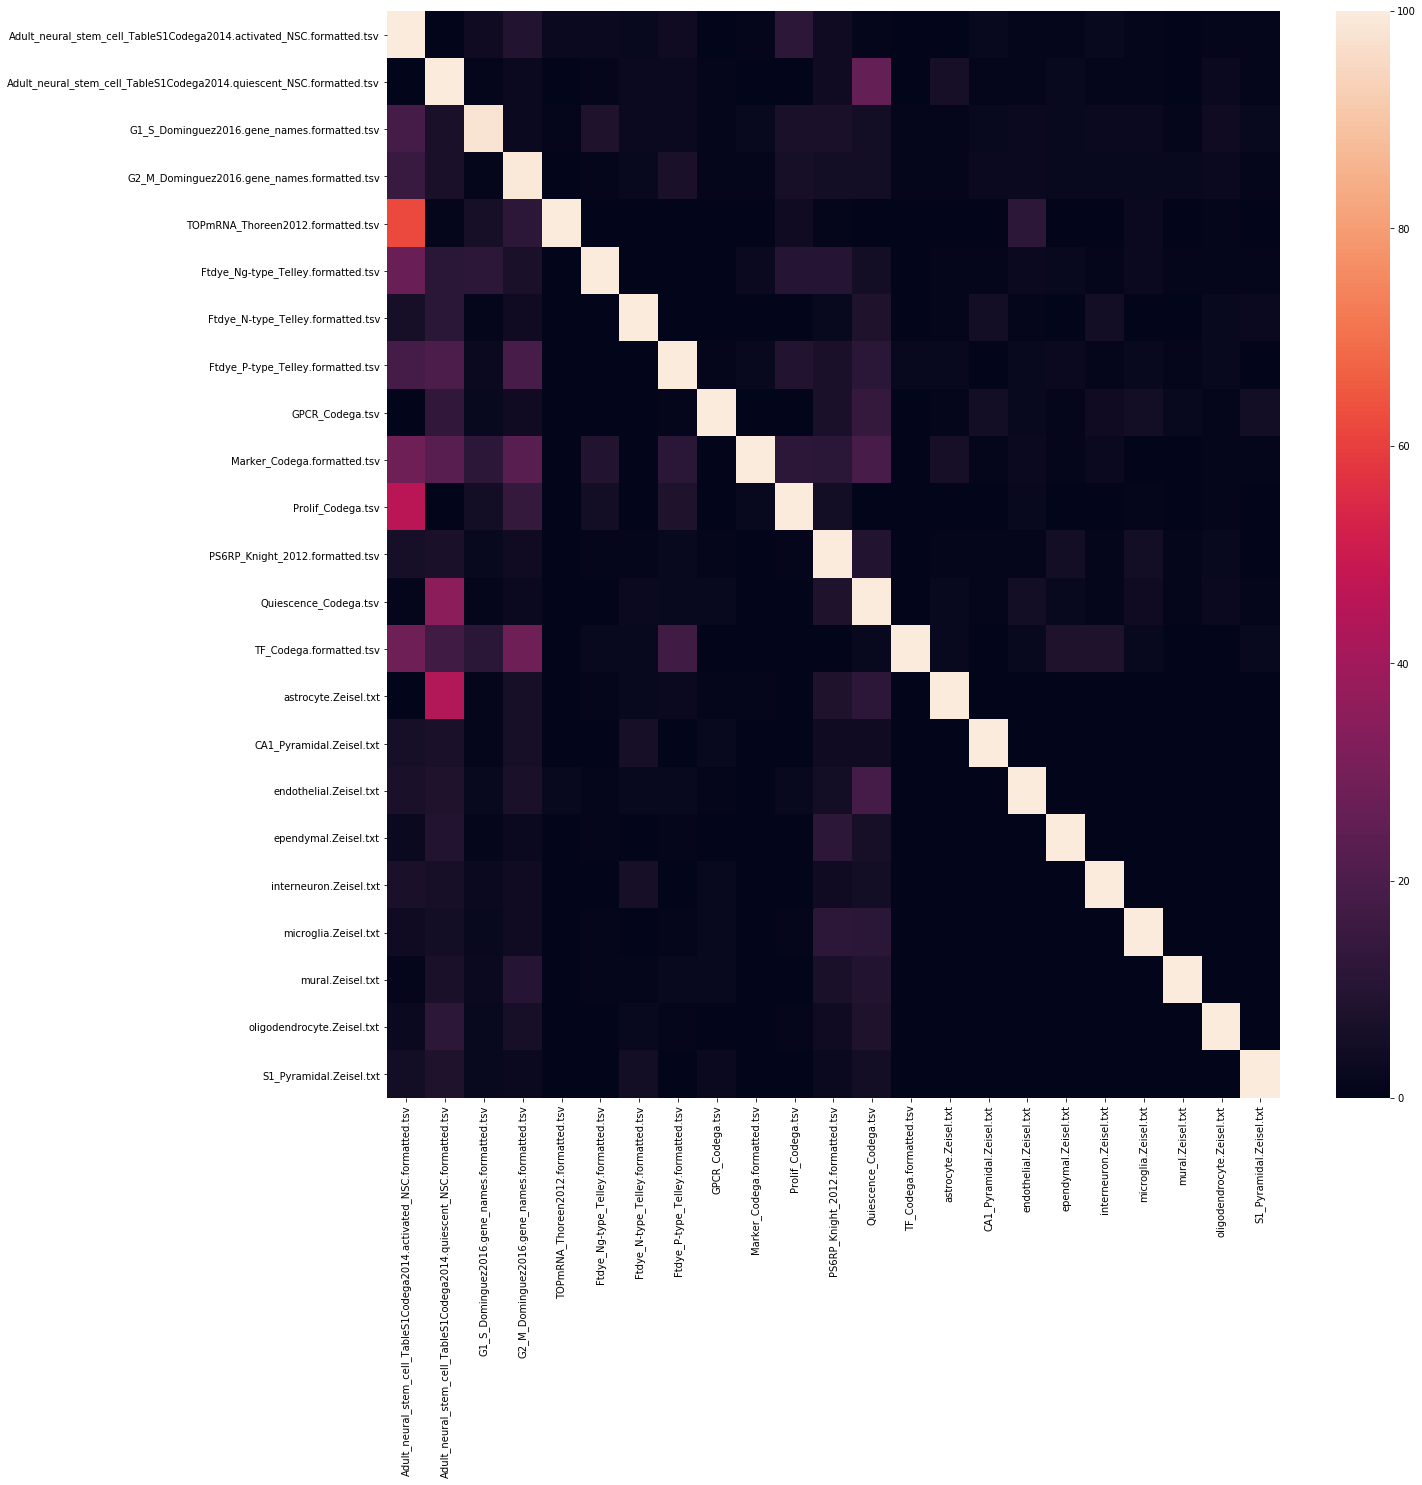

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading data
data = pd.read_csv("/projects/biocompan/201708_IBENS_Spassky_EpendymaStages_A2017/Bioinformatics_platform/Genes_list/results.tsv", sep="\t")

# Displaying the heatmap
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(data)

In [2]:
## Mann Whitney test
import pandas as pd
from scipy.stats import mannwhitneyu

# Loading the DESeq2 results
filepath1 = "/projects/biocompan/Finished/201708_IBENS_Spassky_EpendymaStages_A2017/Bioinformatics_platform/FateChoice_C2013/Eoulsan/diffanaresultsannotation_deseq2_Experiment1-diffana_DIV4_vs_DIV-2.tsv"
exp_results = pd.read_csv(filepath1, usecols=[2, 9], sep="\t")
display(exp_results.head(2))
print(exp_results.dtypes)

# Loading the gene set
filepath2 = "/projects/biocompan/Finished/201708_IBENS_Spassky_EpendymaStages_A2017/Bioinformatics_platform/GSEA/Test_191009/Test_2k/Random_list10.tsv"
gene_set = pd.read_csv(filepath2, header=None, usecols=list(range(2, 2002)), dtype=object, sep="\t").T
gene_set.columns = ["Gene name"]
display(gene_set.head(2))
print(gene_set.dtypes)

# Getting the gene set fold changes
gene_set = gene_set.merge(exp_results, on="Gene name").dropna()
display(gene_set.head())
display(gene_set.shape)
gene_set.to_csv("/data/biocomp/bahin/tmp.tsv", sep="\t")

# generate two independent samples
#data1 = 5 * randn(100) + 50
#data2 = 5 * randn(100) + 51
# compare samples
print(exp_results["log2foldchange DIV4 vs DIV-2"].mean())
print(gene_set["log2foldchange DIV4 vs DIV-2"].mean())
stat, p = mannwhitneyu(exp_results["log2foldchange DIV4 vs DIV-2"], gene_set["log2foldchange DIV4 vs DIV-2"])
print('Statistics=%.3f, p=%.3f' % (stat, p))

,log2foldchange DIV4 vs DIV-2,Gene name
0,5.589193,Slc39a4
1,-3.511454,Col1a1


log2foldchange DIV4 vs DIV-2    float64
Gene name                        object
dtype: object


,Gene name
2,Gm38348
3,Gm5387


Gene name    object
dtype: object


,Gene name,log2foldchange DIV4 vs DIV-2
0,Gm38348,-5.896028
1,Gm5387,2.702324
3,Spsb2,1.295895
4,Natd1,-0.464245
6,Tex261,-0.023667


(1357, 2)

-0.13403953571919663
-0.14848312878951722
Statistics=23386411.000, p=0.000


,Id,baseMean,0,standard error,Wald statistic,Wald test p-value,BH adjusted p-values,dispersions.dds.,EnsemblID,Gene name,...,Chromosome/scaffold name,Start (bp),End (bp),Strand,RefSeq ncRNA ID,MGI ID,MGI symbol,Transcription start site (TSS),Transcript length (including UTRs and CDS),Gene stable ID
0,ENSMUSG00000092274,8447.386461,-5.26872,0.124528,42.309481,0.000000e+00,0.000000e+00,0.009823,ENSMUSG00000092274,Neat1,...,19,5824708,5845478,-1,NaN,MGI:1914211,Neat1,NaN,NaN,NaN
1,ENSMUSG00000098543,893.736397,-5.58698,0.220554,25.331555,1.435158e-141,1.478787e-137,0.019310,ENSMUSG00000098543,Gm27533,...,19,5844286,5844437,-1,NaN,MGI:5530915,Gm27533,NaN,NaN,NaN


(23457, 21)


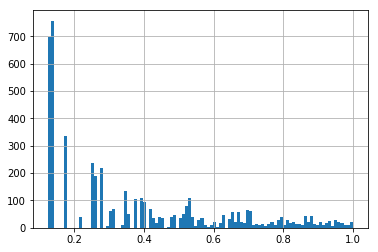

In [26]:
%matplotlib inline
filepath = "/projects/biocompan/Finished/201708_IBENS_Spassky_EpendymaStages_A2017/Bioinformatics_platform/Ependiff_A2016/Eoulsan/diffanaresultsannotation_deseq2_Experiment1-diffana_DIV4_vs_IP-PS6.reverse.tsv"

df = pd.read_csv(filepath, sep="\t")
display(df.head(2))

#print(df["baseMean"].max())
#print(df.loc[df["baseMean"] < 94000, "baseMean"].max())
print(df.loc[df.baseMean == 0].shape)
df.loc[(df.baseMean < 1) & (df.baseMean > 0), "baseMean"].hist(bins=100)

,Id,baseMean,0,standard error,Wald statistic,Wald test p-value,BH adjusted p-values,dispersions.dds.,EnsemblID,Gene name,...,Chromosome/scaffold name,Start (bp),End (bp),Strand,RefSeq ncRNA ID,MGI ID,MGI symbol,Transcription start site (TSS),Transcript length (including UTRs and CDS),Gene stable ID
0,ENSMUSG00000092274,8447.386461,-5.26872,0.124528,42.309481,0.000000e+00,0.000000e+00,0.009823,ENSMUSG00000092274,Neat1,...,19,5824708,5845478,-1,NaN,MGI:1914211,Neat1,NaN,NaN,NaN
1,ENSMUSG00000098543,893.736397,-5.58698,0.220554,25.331555,1.435158e-141,1.478787e-137,0.019310,ENSMUSG00000098543,Gm27533,...,19,5844286,5844437,-1,NaN,MGI:5530915,Gm27533,NaN,NaN,NaN


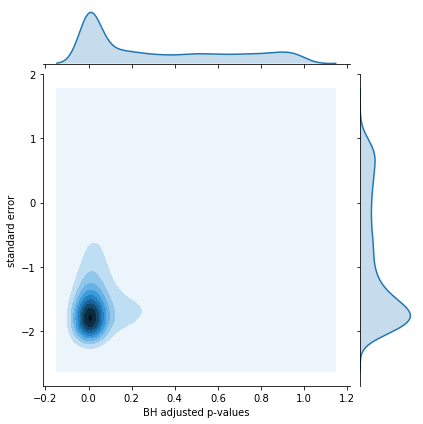

In [21]:
## Displaying various variables agains p-value to understand it
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

filepath = "/projects/biocompan/Finished/201708_IBENS_Spassky_EpendymaStages_A2017/Bioinformatics_platform/Ependiff_A2016/Eoulsan/diffanaresultsannotation_deseq2_Experiment1-diffana_DIV4_vs_IP-PS6.reverse.tsv"
df = pd.read_csv(filepath, sep="\t")
display(df.head(2))

#sns.scatterplot(x="BH adjusted p-values", y="baseMean", data=df)
#sns.scatterplot(x="BH adjusted p-values", y="dispersions.dds.", data=df)
#sns.scatterplot(x="BH adjusted p-values", y="standard error", data=df)
#sns.kdeplot(x="BH adjusted p-values", y="standard error", data=df)
sns.jointplot(x=df["BH adjusted p-values"], y=np.log(df["standard error"]), kind="kde")
#sns.jointplot(x=df["BH adjusted p-values"], y=np.log(df["dispersions.dds."]), kind="kde")
#sns.jointplot(x=df["BH adjusted p-values"], y=np.log(df["baseMean"]), kind="kde")

0   -5.26872
1   -5.58698
2   -5.12446
3   -4.52690
4   -3.41966
Name: 0, dtype: float64

,Id,baseMean,0,standard error,Wald statistic,Wald test p-value,BH adjusted p-values,dispersions.dds.,EnsemblID,Gene name,...,Chromosome/scaffold name,Start (bp),End (bp),Strand,RefSeq ncRNA ID,MGI ID,MGI symbol,Transcription start site (TSS),Transcript length (including UTRs and CDS),Gene stable ID
0,ENSMUSG00000092274,8447.386461,-5.26872,0.124528,42.309481,0.000000e+00,0.000000e+00,0.009823,ENSMUSG00000092274,Neat1,...,19,5824708,5845478,-1,NaN,MGI:1914211,Neat1,NaN,NaN,NaN
1,ENSMUSG00000098543,893.736397,-5.58698,0.220554,25.331555,1.435158e-141,1.478787e-137,0.019310,ENSMUSG00000098543,Gm27533,...,19,5844286,5844437,-1,NaN,MGI:5530915,Gm27533,NaN,NaN,NaN
2,ENSMUSG00000098974,748.431256,-5.12446,0.222487,23.032600,2.198019e-117,1.509892e-113,0.021835,ENSMUSG00000098974,Gm27505,...,19,5844638,5844747,-1,NaN,MGI:5530887,Gm27505,NaN,NaN,NaN
3,ENSMUSG00000064351,105482.123072,-4.52690,0.200450,22.583648,6.274992e-113,3.232876e-109,0.028890,ENSMUSG00000064351,mt-Co1,...,MT,5328,6872,1,NaN,MGI:102504,mt-Co1,NaN,NaN,NaN
4,ENSMUSG00000085438,1581.851847,-3.41966,0.159621,21.423581,8.055190e-102,3.320027e-98,0.016115,ENSMUSG00000085438,1700020I14Rik,...,2,119594297,119607502,1,NaN,MGI:1913852,1700020I14Rik,NaN,NaN,NaN


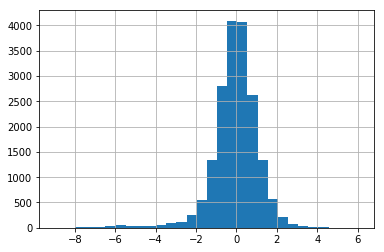

In [8]:
## Displaying the histogram of log2FC
import pandas as pd
%matplotlib inline
df = pd.read_csv("/projects/biocompan/Finished/201708_IBENS_Spassky_EpendymaStages_A2017/Bioinformatics_platform/Ependiff_A2016/Eoulsan/diffanaresultsannotation_deseq2_Experiment1-diffana_DIV4_vs_IP-PS6.reverse.tsv", sep="\t")
display(df["0"].head())
df.loc[df["baseMean"] > 5, "0"].hist(bins=30)
display(df.head())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f4f70c550>,
      dtype=object)

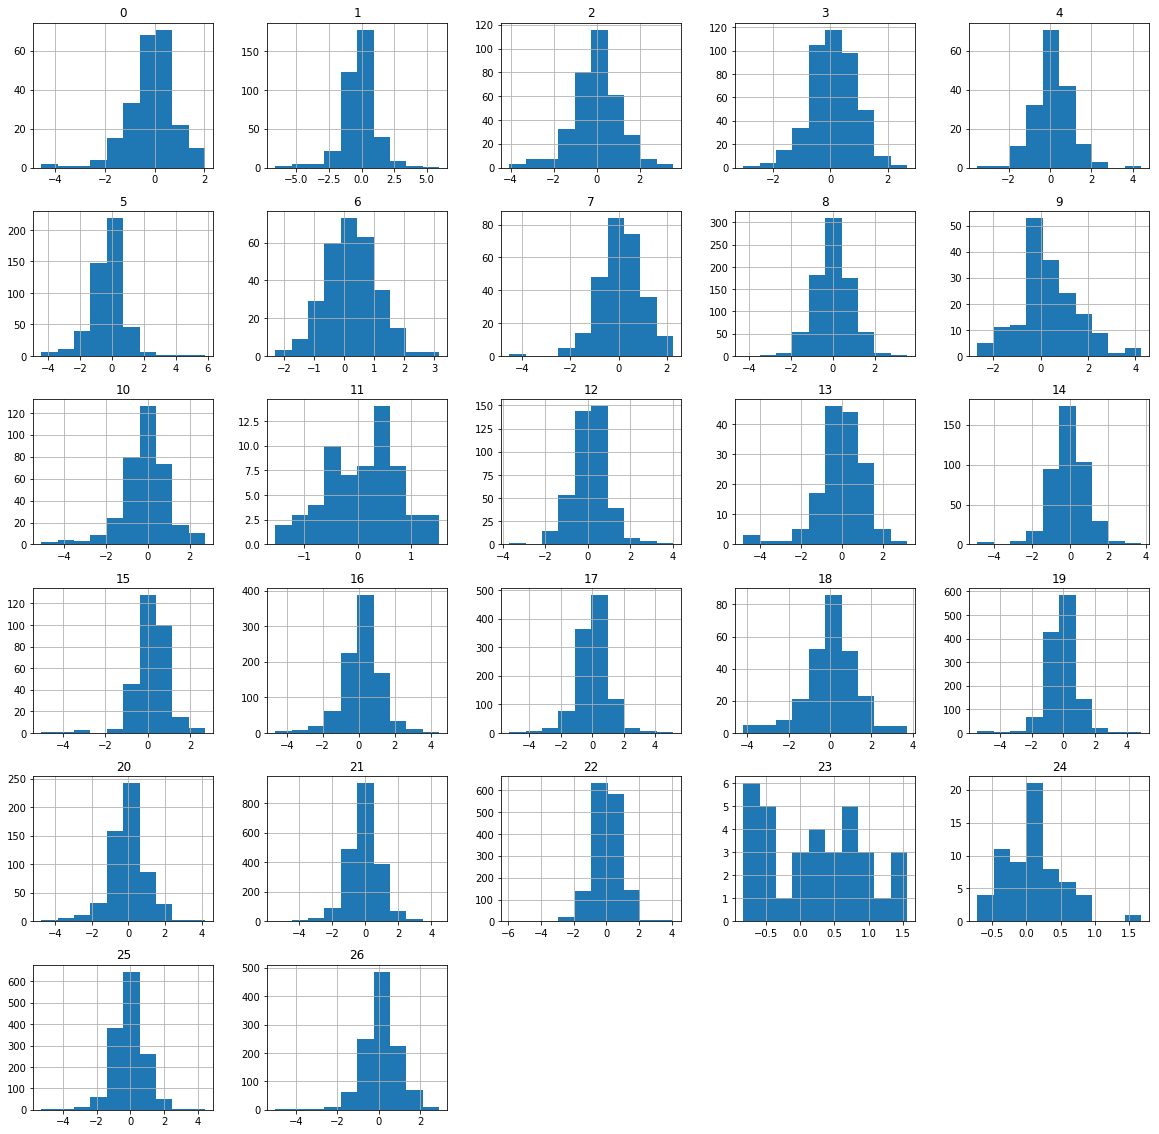

In [51]:
## Displaying gene sets fold changes distributions
import os
import pandas as pd

dirpath = "/projects/biocompan/Finished/201708_IBENS_Spassky_EpendymaStages_A2017/Bioinformatics_platform/Genes_list/GMT_format/"
gene_sets = os.listdir(dirpath)
df["Gene name"] = df["Gene name"].str.lower()
dataset = pd.DataFrame()
for gene_set_filepath in gene_sets:
    # Loading gene set names
    gene_set = pd.read_csv(dirpath + gene_set_filepath, header=None, sep="\t").T
    gene_set = gene_set.loc[2:, ].dropna()
    gene_set.iloc[:, 0] = gene_set.iloc[:, 0].str.lower()
    # Getting gene set fold changes
    temp = df.loc[df["Gene name"].isin(gene_set.iloc[:, 0].tolist()), "0"]
    temp.rename(gene_set_filepath, inplace=True)
    temp.reset_index(drop=True, inplace=True)
    # Adding the new fold change list to the final DataFrame
    dataset = pd.concat([dataset, pd.DataFrame(temp)], ignore_index=True, axis=1)

# Plotting the fold change histograms
dataset.hist(figsize=(20, 20))

,Gene_ID,Gene_name,EpenDiff_adj_pvalue,EpenDiff_FC,FateChoice_adj_pvalue,FateChoice_FC,GemC1_adj_pvalue,GemC1_FC,MCIDAS_adj_pvalue,MCIDAS_FC,FateChoice_FC_log,EpenDiff_FC_log,GemC1_FC_log,MCIDAS_FC_log
0,ENSMUSG00000092274,Neat1,0.000000e+00,0.025939,0.224344,1.675749,0.080767,1.755036,0.873521,1.204886,0.516260,-3.651998,0.562490,0.186385
1,ENSMUSG00000098543,Gm27533,1.478787e-137,0.020804,0.000613,3.513006,NaN,1.638128,0.971040,1.336973,1.256472,-3.872599,0.493554,0.290408


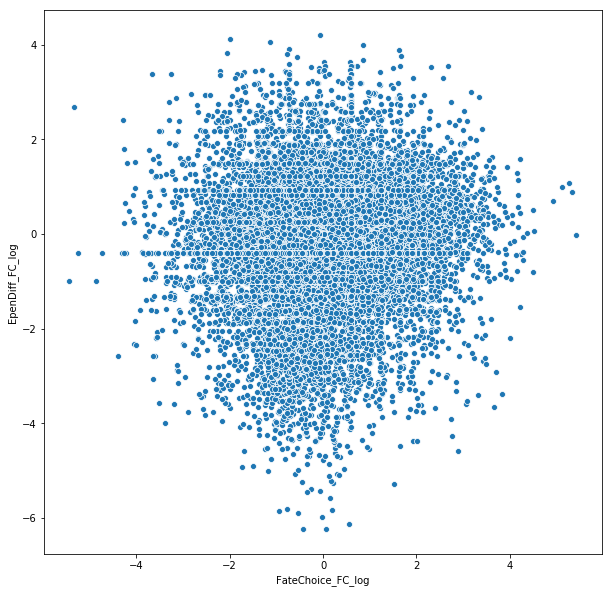

In [23]:
## Plotting GemC1 FC vs MCIDAS fold change
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

filepath = "/projects/biocompan/Bioinformatics_services/201904_IBENS_Spassky_EpendymaStages_A2019/Bioinformatics_platform/Volcano_plot/FateChoice_EpenDiff_GemC1_MCIDAS.tsv"
df = pd.read_csv(filepath, sep="\t", usecols=list(range(10)))
df.loc[:, "FateChoice_FC_log"] = np.log(df["FateChoice_FC"])
df.loc[:, "EpenDiff_FC_log"] = np.log(df["EpenDiff_FC"])
df.loc[:, "GemC1_FC_log"] = np.log(df["GemC1_FC"])
df.loc[:, "MCIDAS_FC_log"] = np.log(df["MCIDAS_FC"])
display(df.head(2))

plt.figure(figsize=(10, 10))
#sns.scatterplot(x="GemC1_FC_log", y="MCIDAS_FC_log", data=df)
sns.scatterplot(x="FateChoice_FC_log", y="EpenDiff_FC_log", data=df)
#plt.xlim(0, 500)
#plt.ylim(0, 500)

,log2foldchange GemC1 vs H2B-GFP,Gene name,Abs_FC
Id,,,
ENSMUSG00000025507,2.530344,Pidd1,2.530344
ENSMUSG00000034227,6.858490,Foxj1,6.858490


,2018_532_S1,2018_533_S2,2018_535_S3,2018_542_S7,2018_566_S8,2018_567_S9
Id,,,,,,
ENSMUSG00000000001,10818.741341,7904.268982,8986.511835,9524.856154,9317.393252,10638.684364
ENSMUSG00000000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


,Id,2018_532_S1,2018_533_S2,2018_535_S3,2018_542_S7,2018_566_S8,2018_567_S9,log2foldchange GemC1 vs H2B-GFP,Gene name,Abs_FC
0,ENSMUSG00000000001,9.289035,8.975158,9.103480,9.16166,9.139638,9.272252,-0.089403,Gnai3,0.089403
1,ENSMUSG00000000028,6.981764,7.054253,6.735537,6.98385,6.847984,6.647976,0.139481,Cdc45,0.139481


,Id,2018_532_S1,2018_533_S2,2018_535_S3,2018_542_S7,2018_566_S8,2018_567_S9,log2foldchange GemC1 vs H2B-GFP,Abs_FC
Gene name,,,,,,,,,
Cfap45,ENSMUSG00000026546,6.080495,6.029084,6.268277,-0.063667,0.446896,0.640392,8.289662,8.289662
Trp73,ENSMUSG00000029026,8.558308,8.179158,8.619462,2.015774,3.742733,2.586302,7.814180,7.814180


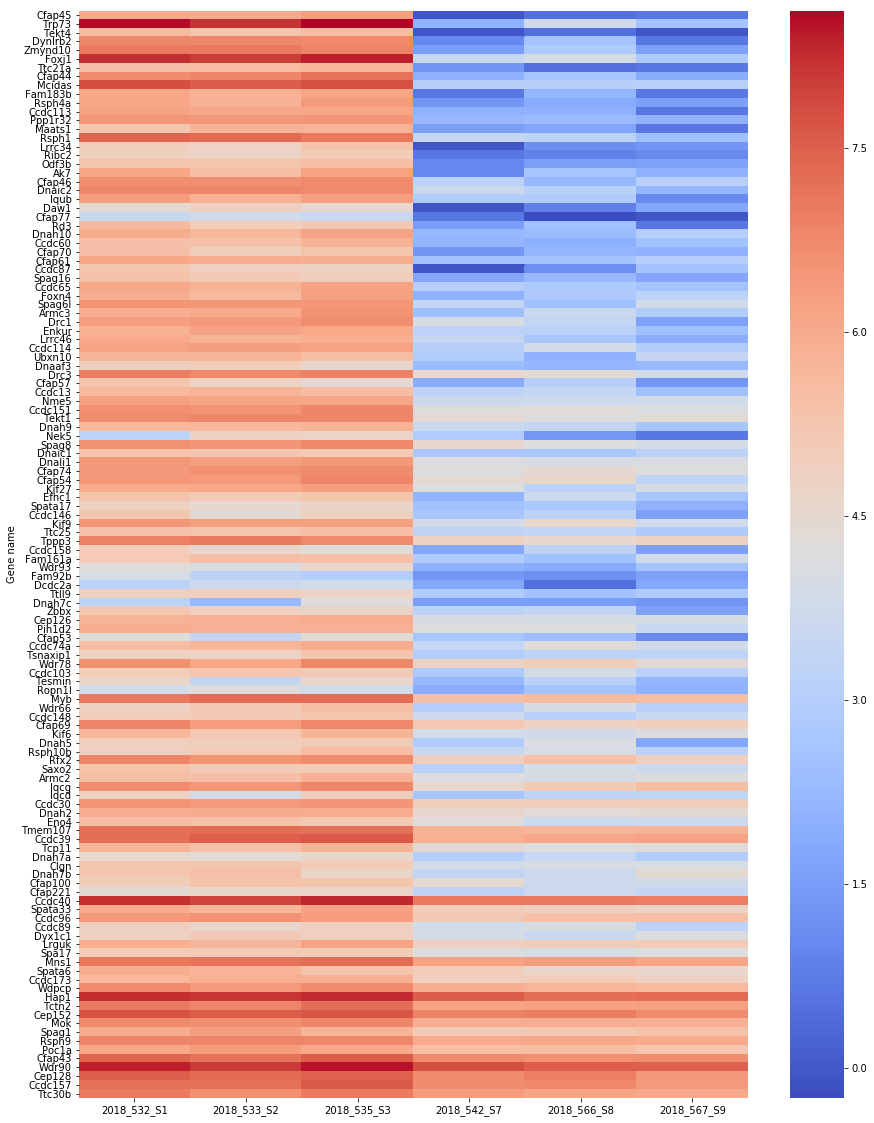

In [40]:
## Creating the 3 heatmaps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dirpath = "/projects/biocompan/Bioinformatics_services/201904_IBENS_Spassky_EpendymaStages_A2019/Bioinformatics_platform/"

# Loading the 3 gene sets
cilia = pd.read_csv(dirpath + "Heatmap/cilia_and_centriole.txt", header=None, names=["Id"])
#display(cilia.head(2))
cell_cycle = pd.read_csv(dirpath + "Heatmap/cell_cycle_and_apoptosis_regulation.txt", header=None, names=["Id"])
#display(cell_cycle)
cell_morpho = pd.read_csv(dirpath + "Heatmap/cell_morpho_and_metabolism.txt", header=None, names=["Id"])
#display(cell_morpho)

# Loading gene ID / gene name index + FC (to sort)
gene_names = pd.read_csv(dirpath + "eoulsan/diffanaresultsannotation_output/diffanaresultsannotation_deseq2_Experiment1-diffana_GemC1_vs_H2B-GFP.tsv", index_col=0, usecols=[0, 2, 9], sep="\t")
gene_names.loc[:, "Abs_FC"] = abs(gene_names["log2foldchange GemC1 vs H2B-GFP"])
#gene_names.sort_values("Abs_FC", ascending=False, inplace=True)
display(gene_names.head(2))

# Loading normalized counts
counts = pd.read_csv(dirpath + "eoulsan/diffanaresultsannotation_output/diffanaresultsannotation_deseq2_Experiment1-normalisation_normalisedCountMatrix.tsv", index_col=0, usecols=[0, 1, 2, 3, 5, 8, 9], sep="\t")
display(counts.head(2))
log_counts = counts.copy()
log_counts.replace(0., np.nan, inplace=True)
log_counts.dropna(inplace=True)
log_counts = log_counts.apply(np.log)
log_counts = log_counts.join(gene_names)
log_counts.reset_index(inplace=True)
display(log_counts.head(2))

# Merging DataFrames
#df = cell_cycle.merge(log_counts)
df = cilia.merge(log_counts)
#df = cell_morpho.merge(log_counts)
df.sort_values("Abs_FC", ascending=False, inplace=True)
df.set_index("Gene name", inplace=True)
display(df.head(2))

# Plotting heatmaps
#sns.clustermap(df, cmap="coolwarm", yticklabels=True, figsize=(10, 20))
plt.subplots(figsize=(15,20))
sns.heatmap(df.iloc[:, 1:7], cmap="coolwarm", yticklabels=True)